<a href="https://colab.research.google.com/github/ahcamachod/inmersion-en-datos/blob/aula-2/INMERSION_DATOS_AULA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bienvenido a nuestro primer encuentro de inmersión de datos.

In [1]:
#from google.colab import drive

#drive.mount('/content/drive')

In [2]:
import pandas as pd

#inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv')
inmuebles = pd.read_csv('f:/Descargas/Cursos/VSC_PROYECTOS/ONEPython/aula2_inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


#**Aula 2**

In [3]:
# Muestra aleatoria de 5 filas
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
1677,Apartamento,Apartamento en venta en Usaquén,1,1,56,Usaquén,Usaquén,$ 360.000.000
2750,Apartamento,Apartamento en venta en Bosa,3,1,48,Bosa,Bosa Central,$ 136.000.000
5916,Apartamento,Apartamento en venta en Usaquén,1,2,59,Usaquén,Usaquén,$ 369.000.000
5345,Apartamento,Apartamento en venta en Bosa,3,1,48,Bosa,Bosa Central,$ 136.000.000
8511,Apartamento,Apartamento en venta en Quinta Camacho,2,2,102,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 320.000.000


In [4]:
# Qué hay en nuestro dataset
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [5]:
# Valor entre comillas - string
inmuebles.Valor[0]

'$ 360.000.000'

In [6]:
# De qué tipo es el valor de índice 0 - string
type(inmuebles.Valor[0])

str

In [7]:
# Suma de valores string: sin separación, strings concatenados, sin suma
inmuebles.Valor[0]+inmuebles.Valor[1]+inmuebles.Valor[:5] # :5 = valores del 0 al 4

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

In [8]:
# Hacer la separación en el espacio en blanco entre el signo pesos y el valor no numérico
inmuebles.Valor[0].split()

['$', '360.000.000']

In [9]:
# Convertir toda mi columna panda series en listas
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [10]:
valor = inmuebles.Valor.str.split(expand=True) # A valor le adjudicamos el dataframe
inmuebles['Moneda'] = valor[0] # Generar nuevas columnas en mi dataframe # $ en string / objeto
inmuebles['Precio'] = valor[1] # Valor numérico en string / objeto
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio
4151,Apartamento,Apartamento en venta en Bosa,3,1,54,Bosa,Bosa Central,$ 158.000.000,$,158.000.000
4152,Casa,Casa en venta en Cantagallo,4,3,69,Cantagallo,Britalia,$ 310.000.000,$,310.000.000
9475,Casa,Casa en venta en Restrepo,3,3,67,Restrepo,Restrepo,$ 290.000.000,$,290.000.000


In [11]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [12]:
# Concatenación de strings valores
inmuebles['Precio'].sum()

'360.000.000670.000.0001.120.000.000890.000.000970.000.000510.000.000500.000.0002.350.000.000850.000.000642.000.000652.000.000168.000.000205.000.000300.000.000680.000.0002.519.000.000420.000.000620.000.000239.000.0001.600.000.000420.000.000625.000.0002.799.000.0001.450.000.0002.000.000.000670.000.0001.800.000.000469.000.000580.000.000445.000.000261.500.000278.000.000258.000.000520.000.000200.000.000129.000.000350.000.000290.500.000750.000.000495.000.000285.000.000900.000.0001.800.000.000990.000.000418.000.000349.000.000565.000.000370.000.000259.000.000310.000.000354.000.000372.000.000500.000.000420.000.0001.050.000.000185.000.000349.000.000515.000.000287.000.000265.000.000500.000.000261.500.000300.000.000278.000.000258.000.000520.000.000350.000.000290.500.000129.000.000200.000.000750.000.000418.000.000495.000.000349.000.000310.000.000565.000.000370.000.000259.000.000354.000.000285.000.000420.000.000372.000.000500.000.000185.000.0001.050.000.000349.000.0001.800.000.000900.000.000990.000

In [13]:
# Reemplazar el punto por nada en el campo Precio - sin regex WARNING!
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','')

In [14]:
# Reemplazar el punto por nada en el campo Precio
#inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [15]:
# Visualización de columnas
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [16]:
# Moneda y precio siguen siendo objects
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [22]:
# Convertir de string a float (numérico)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000 # Creación de nueva columna quitando seis ceros
inmuebles.info() # Ahora Precio_Millon es de tipo float, punto flotante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Baños          9520 non-null   int64  
 4   Área           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.3+ KB


In [18]:
# count: conteo de filas, mean: promedio, std: desvío estandar (distribución o concentración de la media), min: valor mínimo, 25%: primer cuartil, 50%: la mediana o segundo cuartil, 75%: tercer cuartil, max: valor máximo
inmuebles.describe()

,Habitaciones,Baños,Área,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [24]:
# Eliminar posiciones decimales
pd.set_option('display.precision',2) # Precisión de dos cifras decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Funciones lambda para especificar algo muy sencillo
inmuebles.describe()

,Habitaciones,Baños,Área,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [25]:
# Consultar qué inmueble tiene 110 habitaciones
inmuebles.loc[inmuebles.Habitaciones == 110] # loc = localizar

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [27]:
# Consultar qué inmueble tiene 2 metros cuadrados de área
#inmuebles.loc[inmuebles.Area == 2]
inmuebles.loc[inmuebles.Área == 2]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

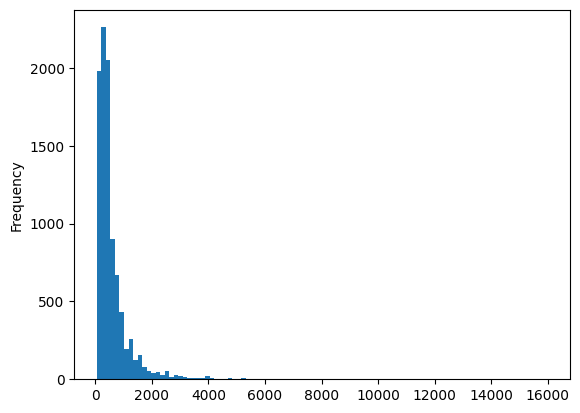

In [30]:
# Gráfico de histograma de los precios de los inmuebles en millones de pesos
inmuebles['Precio_Millon'].plot.hist(bins=100) # Rangos más pequeños para observar un comportamiento (cantidad de repeticiones / frecuencia de una variable)
# La mayor cantidad de inmuebles tienen un precio de entre $1.000.000 y $2.000.000 millones de pesos

<Axes: ylabel='Frequency'>

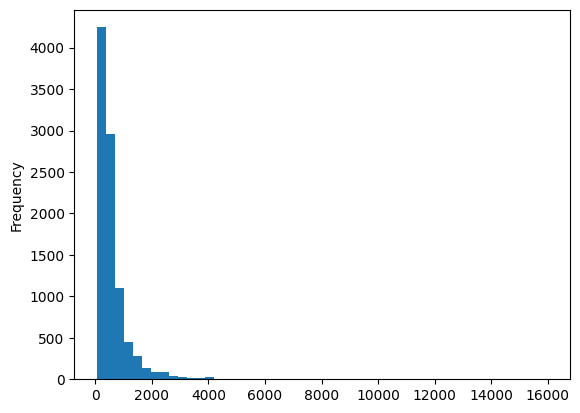

In [32]:
# Gráfico de histograma de los precios de los inmuebles en millones de pesos
inmuebles['Precio_Millon'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

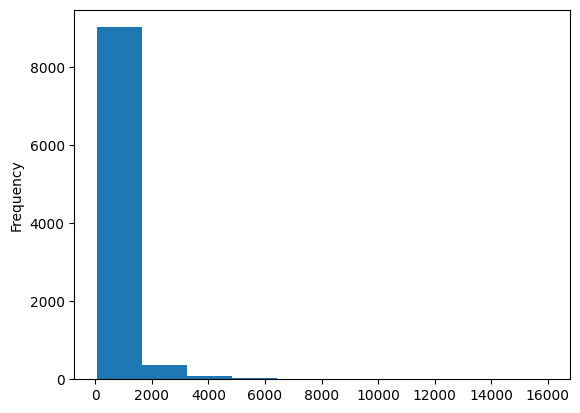

In [31]:
# Gráfico de histograma de los precios de los inmuebles en millones de pesos
inmuebles['Precio_Millon'].plot.hist(bins=10) # bins: separación de cada rango bloque a visualizar en el eje horizontal
# No es de utilidad porque todo se concentra en una sola barra - más bins, más barras
# Pandas por detrás utiliza matplotlib para realizar el gráfico

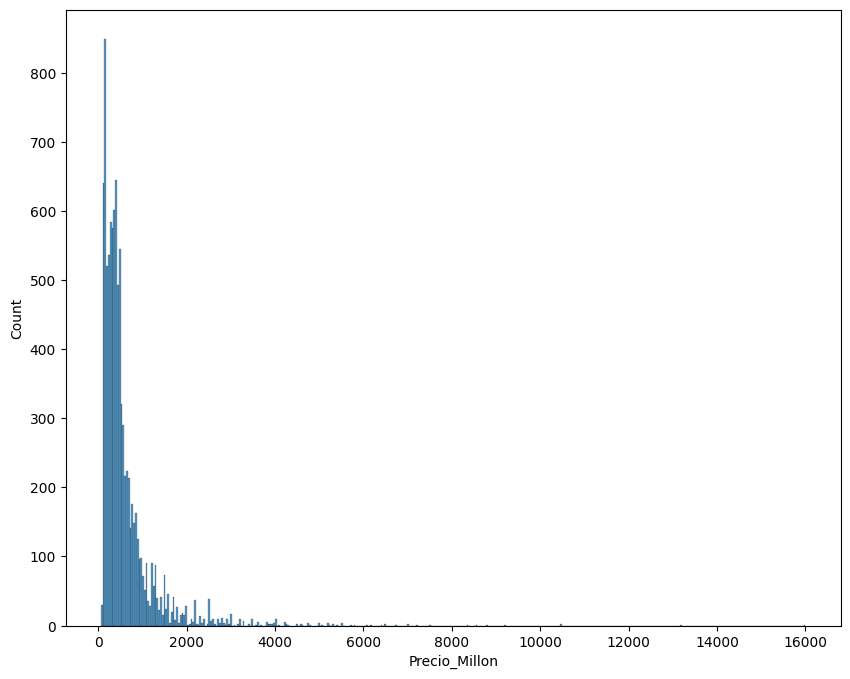

In [34]:
import matplotlib.pyplot as plt # Realización de gráficos más sencillos
import seaborn as sns # Visualización de datos estadísticos basada en matplotlib

plt.figure(figsize=(10,8)) # Preparar el lienzo - 10 de ancho, 8 de altura
grafica = sns.histplot(data=inmuebles, x='Precio_Millon')
plt.show()

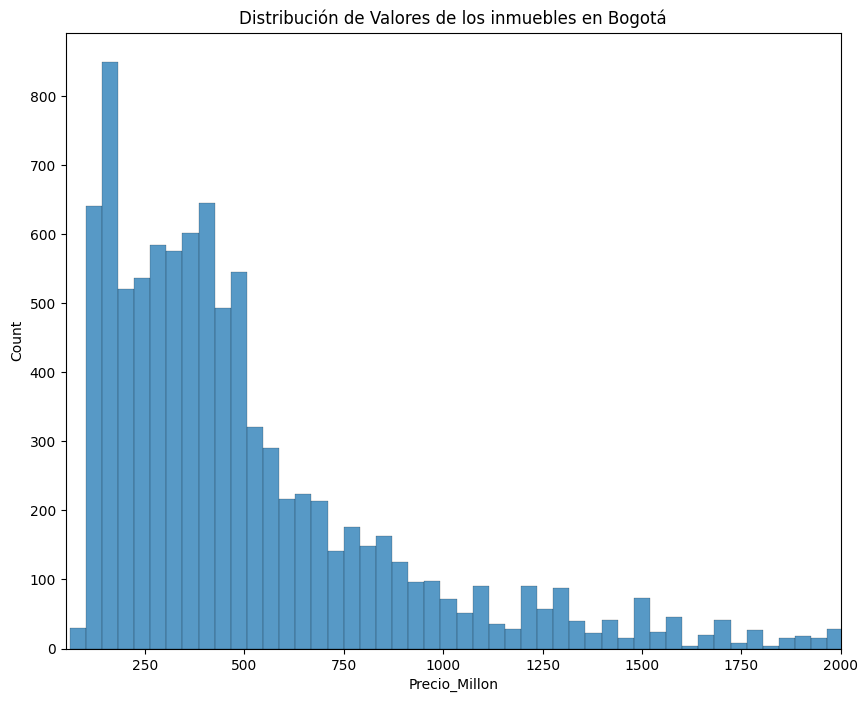

In [38]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá') # Título del gráfico
plt.xlim((50,2000)) # Limite de los valores
plt.show()

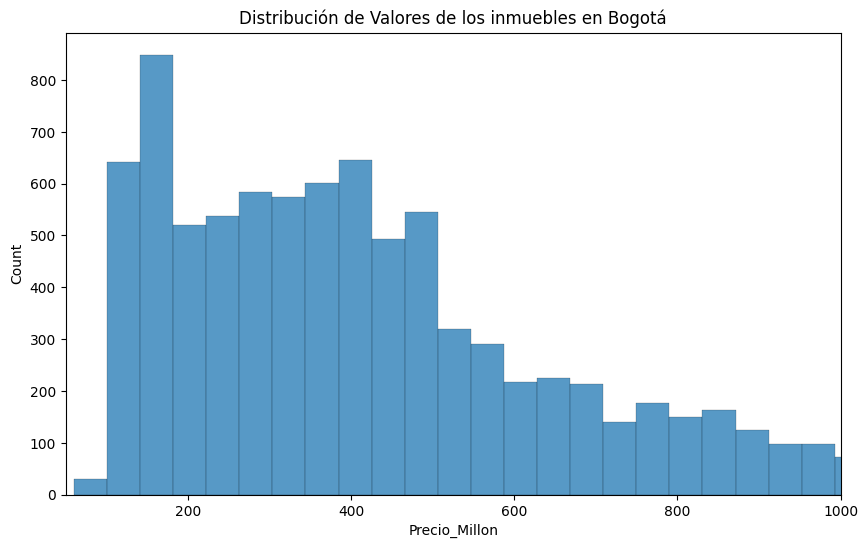

In [37]:
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
plt.show()

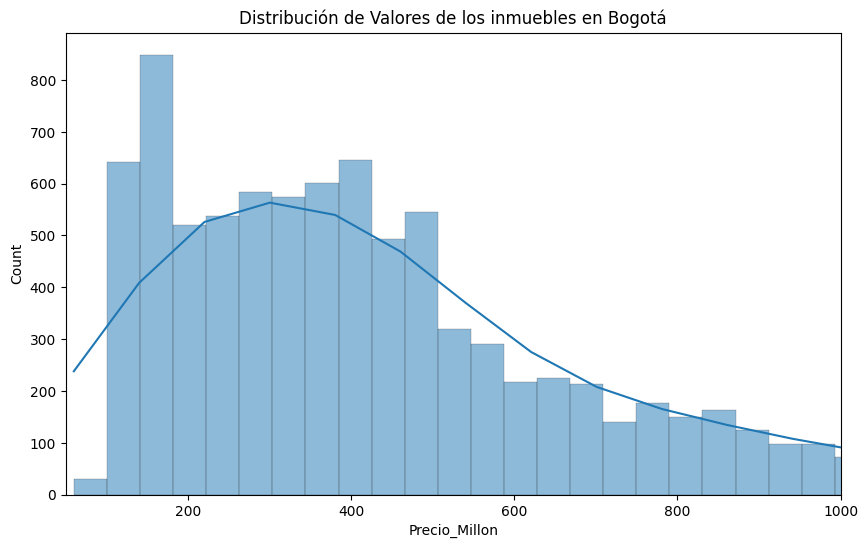

In [39]:
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True) # Parámetros del histograma - kde: curva de densidad
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
plt.show()

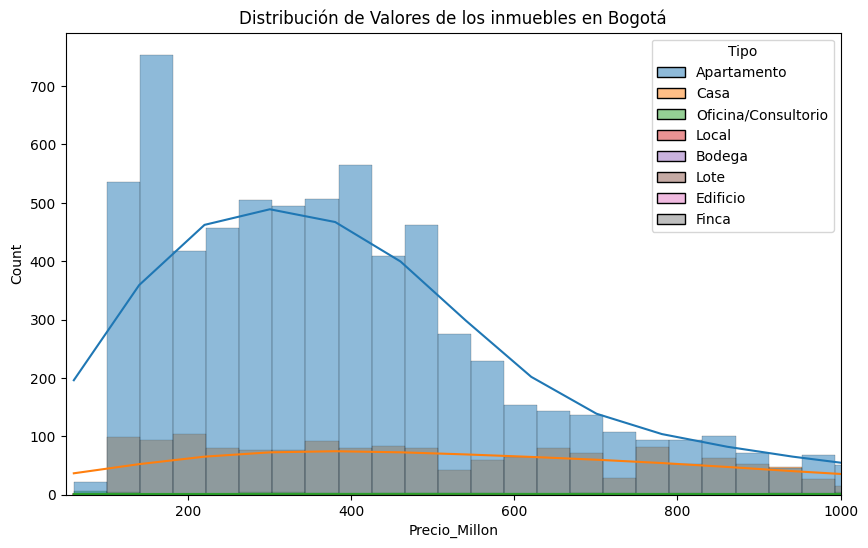

In [44]:
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo') # Parámetros del histograma - hue: añadir otra dimensión (tipo de inmueble)
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
#plt.savefig('/content/drive/MyDrive/inmersion_datos/valor_inmuebles.png',format='png') # Exportar gráfico
plt.savefig('f:/Descargas/Cursos/VSC_PROYECTOS/ONEPython/aula2_valor_inmuebles.png',format='png')
plt.show()

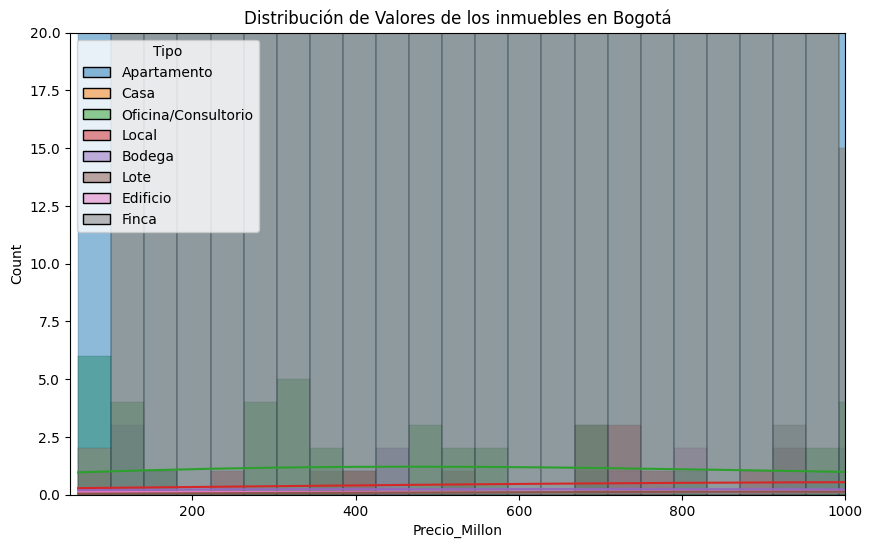

In [45]:
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo') # Parámetros del histograma - hue: añadir otra dimensión (tipo de inmueble)
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
plt.ylim((0,20)) # Limitar la distribución según el tipo
#plt.savefig('/content/drive/MyDrive/inmersion_datos/valor_inmuebles.png',format='png') # Exportar gráfico
plt.savefig('f:/Descargas/Cursos/VSC_PROYECTOS/ONEPython/aula2_valor_inmuebles2.png',format='png')
plt.show()

**Desafíos**

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

In [61]:
# 1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)
inmuebles_aula2 = inmuebles[inmuebles.Tipo.isin(['Local', 'Bodega', 'Oficina/Consultorio'])]
inmuebles_aula2.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
107,Oficina/Consultorio,Oficina/Consultorio en venta en Ciudad Salitre,4,2,200,Ciudad Salitre,Ciudad Salitre Oriental,$ 2.000.000.000,$,2000000000,2000.00
174,Oficina/Consultorio,Oficina/Consultorio en venta en Ciudad Salitre,4,2,200,Ciudad Salitre,Ciudad Salitre Oriental,$ 2.000.000.000,$,2000000000,2000.00
330,Local,Local en venta en Chapinero,2,2,74,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 350.000.000,$,350000000,350.00
357,Bodega,Bodega en venta en Puente Aranda,3,2,68,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 164.000.000,$,164000000,164.00
875,Oficina/Consultorio,Oficina/Consultorio en venta en Chico Reservado,2,1,37,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 280.000.000,$,280000000,280.00


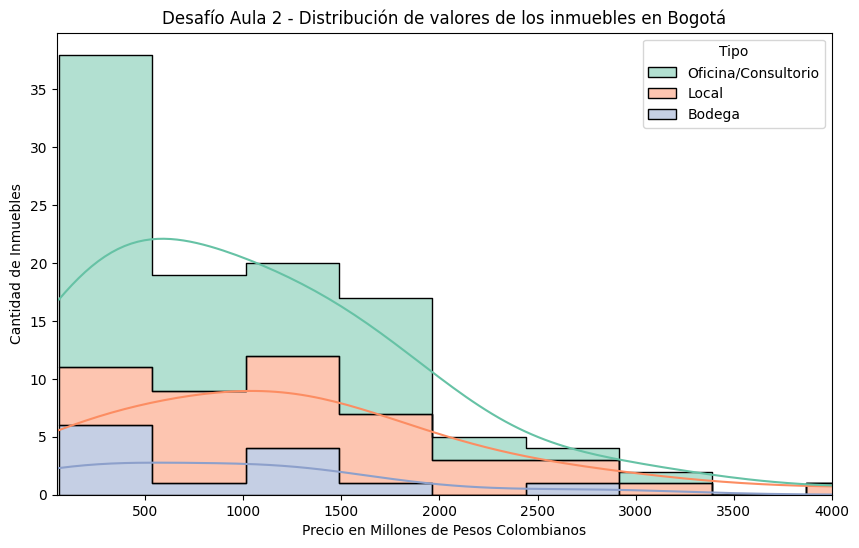

In [70]:
# 1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)
plt.figure(figsize=(10,6))
grafica_aula2 = sns.histplot(data=inmuebles_aula2, x='Precio_Millon', kde=True, hue='Tipo', element="step", multiple="stack", palette = "Set2")
grafica_aula2.set_title('Desafío Aula 2 - Distribución de valores de los inmuebles en Bogotá')
plt.xlim((50,4000))
plt.xlabel('Precio en Millones de Pesos Colombianos')
plt.ylabel('Cantidad de Inmuebles')
plt.savefig('f:/Descargas/Cursos/VSC_PROYECTOS/ONEPython/aula2_valor_inmuebles_desafio1.png',format='png')
plt.show()

In [69]:
# 2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable
inmuebles['Precio_m2'] = inmuebles['Precio_Millon'] / inmuebles['Área']
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Precio_m2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58


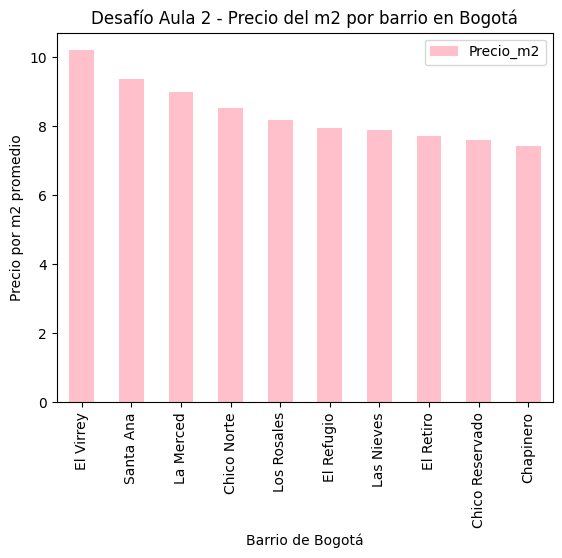

In [73]:
# 2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable
precio_m2_inmuebles=inmuebles[['Barrio','Precio_m2']].groupby(['Barrio']).mean().sort_values(by=['Precio_m2'], ascending=False).head(10)
precio_m2_inmuebles.plot(kind='bar', color = "pink")
plt.xlabel('Barrio de Bogotá')
plt.ylabel('Precio por m2 promedio')
plt.title('Desafío Aula 2 - Precio del m2 por barrio en Bogotá')
plt.savefig('f:/Descargas/Cursos/VSC_PROYECTOS/ONEPython/aula2_valor_inmuebles_desafio2.png',format='png')
plt.show()